# Capstone 3 Data Wrangling & Exploratory Data Analysis

## Contents
1. [Imports](#1.-Imports)
2. [Load Solar Power Generation Data](#2.-Load-Solar-Power-Generation-Data)
3. [Explore the Data](#3.-Explore-the-Data)
4. [Data Cleaning](#4.-Data-Cleaning)
5. [Merge DataFrames](#5.-Merge-DataFrames)
6. [Check for Missing Values & Duplicates](#6.-Check-for-Missing-Values-&-Duplicates)
7. [Create DateTime Features](#7.-Create-DateTime-Features)
8. [Save Clean Data](#8.-Save-Clean-Data)

##  1. Imports

In [1]:
import os
import re
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Solar Power Generation Data

In [2]:
generation1 = pd.read_csv('../data/Plant_1_Generation_Data.csv')
generation2 = pd.read_csv('../data/Plant_2_Generation_Data.csv')
weather1 = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')
weather2 = pd.read_csv('../data/Plant_2_Weather_Sensor_Data.csv')

## 3. Explore the Data

In [3]:
generation1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
generation2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
weather2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


## 4. Data Cleaning

In [7]:
generation1.DATE_TIME = pd.to_datetime(generation1.DATE_TIME,format='%d-%m-%Y %H:%M')
generation2.DATE_TIME = pd.to_datetime(generation2.DATE_TIME)
weather1.DATE_TIME = pd.to_datetime(weather1.DATE_TIME)
weather2.DATE_TIME = pd.to_datetime(weather2.DATE_TIME)

In [8]:
for df in [generation1, generation2, weather1, weather2]:
    print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_PO

In [9]:
for df in [generation1, generation2, weather1, weather2]:
    print(df.DATE_TIME.head(), "\n")

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns] 

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns] 

0   2020-05-15 00:00:00
1   2020-05-15 00:15:00
2   2020-05-15 00:30:00
3   2020-05-15 00:45:00
4   2020-05-15 01:00:00
Name: DATE_TIME, dtype: datetime64[ns] 

0   2020-05-15 00:00:00
1   2020-05-15 00:15:00
2   2020-05-15 00:30:00
3   2020-05-15 00:45:00
4   2020-05-15 01:00:00
Name: DATE_TIME, dtype: datetime64[ns] 



In [10]:
for df in [generation1, generation2, weather1, weather2]:
    print(df.isna().sum(), "\n")

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64 

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64 

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64 

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64 



## 5. Merge DataFrames

In [11]:
# Pre-merge prep: drop PLANT_ID and SOURCE_KEY in weather data
weather1.drop(['PLANT_ID','SOURCE_KEY'],axis=1,inplace=True)
weather2.drop(['PLANT_ID','SOURCE_KEY'],axis=1,inplace=True)

In [12]:
plant_df1 = pd.merge(generation1,weather1,how='left',on='DATE_TIME')
plant_df2 = pd.merge(generation2,weather2,how='left',on='DATE_TIME')

In [13]:
# # drop PLANT_ID_y and SOURCE_KEY_y
# plant_df1.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1,inplace=True)
# plant_df2.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1,inplace=True)

In [14]:
plant_df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [15]:
plant_df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


## 6. Check for Missing Values & Duplicates

In [16]:
plant_df1.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64

In [17]:
plant_df1[plant_df1['IRRADIATION'].isna()]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
38544,2020-06-03 14:00:00,4135001,1IF53ai7Xc0U56Y,7003.0,685.8,5601.0,6330385.0,NaN,NaN,NaN
38545,2020-06-03 14:00:00,4135001,adLQvlD726eNBSB,7204.0,705.4,5685.0,6419961.0,NaN,NaN,NaN
38546,2020-06-03 14:00:00,4135001,wCURE6d3bPkepu2,7545.0,738.7,5579.0,6928448.0,NaN,NaN,NaN
38547,2020-06-03 14:00:00,4135001,z9Y9gH1T5YWrNuG,7946.0,777.8,5541.0,7152815.0,NaN,NaN,NaN


In [18]:
plant_df1.dropna(inplace=True)
plant_df1.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [19]:
# plant_df2.isna().sum()

In [20]:
# print(plant_df1[plant_df1.duplicated()])
# print(plant_df2[plant_df2.duplicated()])

In [21]:
plant_df1.columns = [col.lower() for col in plant_df1.columns]
plant_df2.columns = [col.lower() for col in plant_df2.columns]

## 7. Create DateTime Features

In [22]:
for df in [plant_df1, plant_df2]:
    df['date'] = df['date_time'].dt.date
    df['time'] = df['date_time'].dt.time
    df['hour'] = df['date_time'].dt.hour
    df['day'] = df['date_time'].dt.day
    df['weekday'] = df['date_time'].dt.day_name()
    df['month'] = df['date_time'].dt.month
    df['year'] = df['date_time'].dt.year

In [23]:
plant_df1.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield', 'ambient_temperature',
       'module_temperature', 'irradiation', 'date', 'time', 'hour', 'day',
       'weekday', 'month', 'year'],
      dtype='object')

## 8. Save Clean Data

In [24]:
print(plant_df1.shape)
print(plant_df2.shape)

# plant_df1.to_csv('../data/plant1_cleaned.csv',index=False)
# plant_df2.to_csv('../data/plant2_cleaned.csv',index=False)

(68774, 17)
(67698, 17)


# Exploratory Data Analysis

## Plant Generation Data

### Average Hourly Power Generation Observations

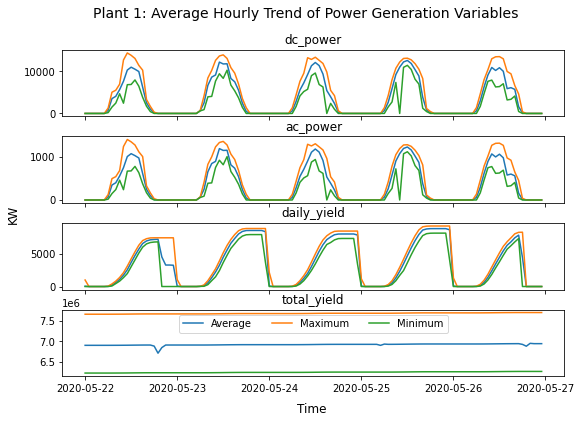

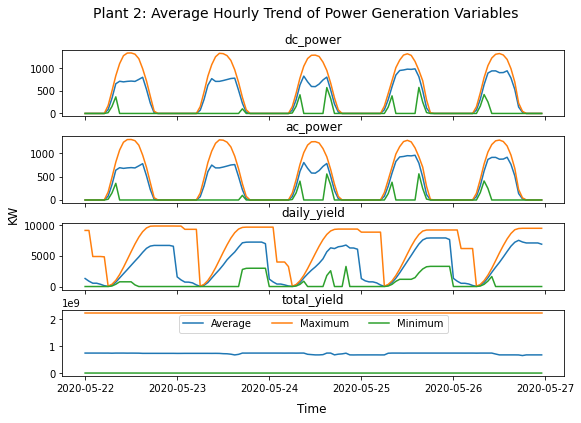

In [25]:
# Plant 1: Power Generation Variables to plot
vars = ['dc_power','ac_power','daily_yield','total_yield'] 

fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(9,6))
fig.suptitle('Plant 1: Average Hourly Trend of Power Generation Variables', fontsize=14)

for i in range(4):
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').mean()['2020-05-22':'2020-05-26'][vars[i]], label='Average') # Average hourly
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').max()['2020-05-22':'2020-05-26'][vars[i]], label='Maximum') # Max. hourly
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').min()['2020-05-22':'2020-05-26'][vars[i]], label='Minimum') # Min. hourly
    axs[i].set_title(vars[i])
fig.subplots_adjust(hspace=0.3)
fig.text(0.04, 0.5, 'KW', va='center', rotation='vertical', fontsize=12)
fig.text(0.51, 0.04, 'Time', ha='center', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.show();

# Plant 2: Power Generation Variables to plot
vars = ['dc_power','ac_power','daily_yield','total_yield'] 

fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(9,6))
fig.suptitle('Plant 2: Average Hourly Trend of Power Generation Variables', fontsize=14)

for i in range(4):
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').mean()['2020-05-22':'2020-05-26'][vars[i]], label='Average') # Average hourly
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').max()['2020-05-22':'2020-05-26'][vars[i]], label='Maximum') # Max. hourly
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').min()['2020-05-22':'2020-05-26'][vars[i]], label='Minimum') # Min. hourly
    axs[i].set_title(vars[i])
fig.subplots_adjust(hspace=0.3)
fig.text(0.04, 0.5, 'KW', va='center', rotation='vertical', fontsize=12)
fig.text(0.51, 0.04, 'Time', ha='center', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.show();

### Inverter Performance

***

A solar panel produces DC power (direct current energy) and inverters convert it into AC power for residential and industrial use.

- power out = AC power
- power in = DC power
- efficiency = power out / power in
***

### Number of Inverters

In [73]:
print('\nNumber of Inverters in Plant 1: ',len(plant_df1.source_key.unique()))
print('\nNumber of Inverters in Plant 2: ',len(plant_df2.source_key.unique()))


Number of Inverters in Plant 1:  22

Number of Inverters in Plant 2:  22


In [27]:
plant_df1.date = plant_df1.date.astype(str)
plant_df2.date = plant_df2.date.astype(str)
plant_df1.time = plant_df1.time.astype(str)
plant_df2.time = plant_df2.time.astype(str)

## DC Power and AC Power

### Inverter/Conversion Efficiency
- Inverter/Conversion efficiency is given by the ratio of AC power generated by the
inverter to the DC power generated by the PV array system.

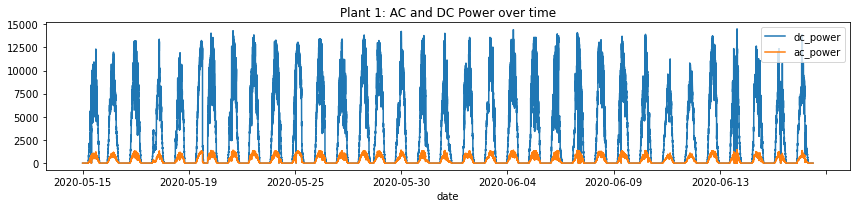

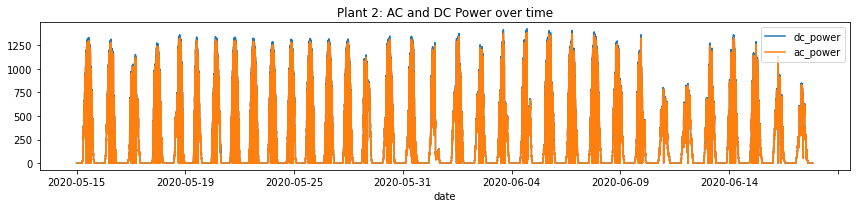

In [28]:
plant_df1.plot(x='date',y=['dc_power','ac_power'],figsize=(12,3))
plt.title('Plant 1: AC and DC Power over time')
plt.tight_layout();

plant_df2.plot(x='date',y=['dc_power','ac_power'],figsize=(12,3))
plt.title('Plant 2: AC and DC Power over time')
plt.tight_layout();

In [29]:
plant1_dc = plant_df1[plant_df1.dc_power > 0]['dc_power'].values
plant1_ac = plant_df1[plant_df1.ac_power > 0]['ac_power'].values
dc_ac_ratio1 = np.mean(plant1_ac)/np.mean(plant1_dc) * 100

plant2_dc = plant_df2[plant_df2.dc_power > 0]['dc_power'].values
plant2_ac = plant_df2[plant_df2.ac_power > 0]['ac_power'].values
dc_ac_ratio2 = np.mean(plant2_ac)/np.mean(plant2_dc) * 100

efficiency_conversion_ratio = dc_ac_ratio2/dc_ac_ratio1

print("Plant 1's AC/DC ratio: ", dc_ac_ratio1)
print("Plant 2's AC/DC ratio: ", dc_ac_ratio2)
print("Efficiency Converversion Ratio: ", efficiency_conversion_ratio)

Plant 1's AC/DC ratio:  9.779504980482011
Plant 2's AC/DC ratio:  97.80134066733811
Efficiency Converversion Ratio:  10.000643270035708


***

**Note:** The difference between plant 1's DC and AC power seems peculiar: DC power is around 10 times AC power. Conversion efficiency for solar inverters are typically around 97% to 99% meaning energy loss is relatively minor. It is either that plant 1 experiences substantial loss from DC-AC conversion (perhaps due to faulty equiptment) or caused by human error during the data collection phase. We're going to rescale plant 1's DC power by dividing by our conversion efficiency ratio that we found above.

***

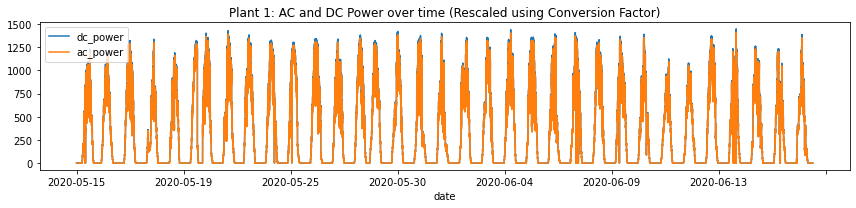

In [30]:
plant_df1['dc_power'] = plant_df1['dc_power'] / efficiency_conversion_ratio

plant_df1.plot(x='date',y=['dc_power','ac_power'],figsize=(12,3))
plt.title('Plant 1: AC and DC Power over time (Rescaled using Conversion Factor)')
plt.tight_layout();

### Which inverter is underperforming?

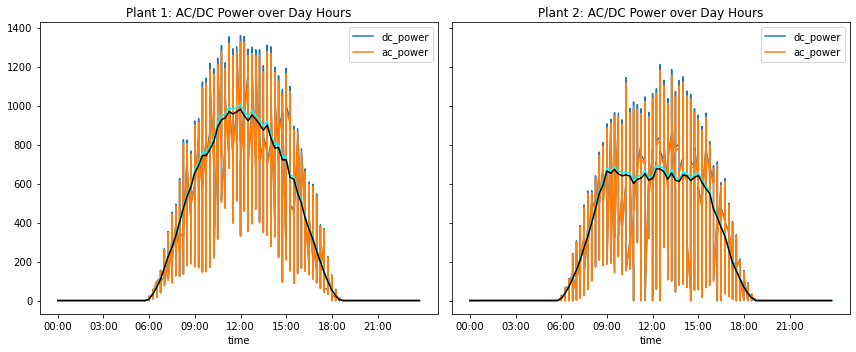

In [31]:
p1 = plant_df1.groupby('date_time').mean().reset_index()
p1['time']=p1['date_time'].dt.time
p2 = plant_df2.groupby('date_time').mean().reset_index()
p2['time']=p2['date_time'].dt.time

hourly_ticks = [60*60*i for i in range(0,24,3)]

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,5))
p1.set_index('time')[['dc_power','ac_power']].plot(style='-',xticks=hourly_ticks,title='Plant 1: AC/DC Power over Day Hours',ax=ax1)
p1.groupby('time')['dc_power'].agg('mean').plot(color='cyan',ax=ax1)
p1.groupby('time')['ac_power'].agg('mean').plot(color='black',ax=ax1)
plt.tight_layout();

p2.set_index('time')[['dc_power','ac_power']].plot(style='-',xticks=hourly_ticks,title='Plant 2: AC/DC Power over Day Hours',ax=ax2)
p2.groupby('time')['dc_power'].agg('mean').plot(color='cyan',ax=ax2)
p2.groupby('time')['ac_power'].agg('mean').plot(color='black',ax=ax2)
plt.tight_layout();

***

**Note:** AC/DC power generation starts at ~6AM and ends at ~6PM (day light hours). We see a nice bell-shaped curve in Plant 1; however, it seems that Plant 2's AC/DC power seems to be capped at a threshold. We will take a look at how each inverter works during day hours to get a better understanding of what is going on. We will focus on DC power generation.

***

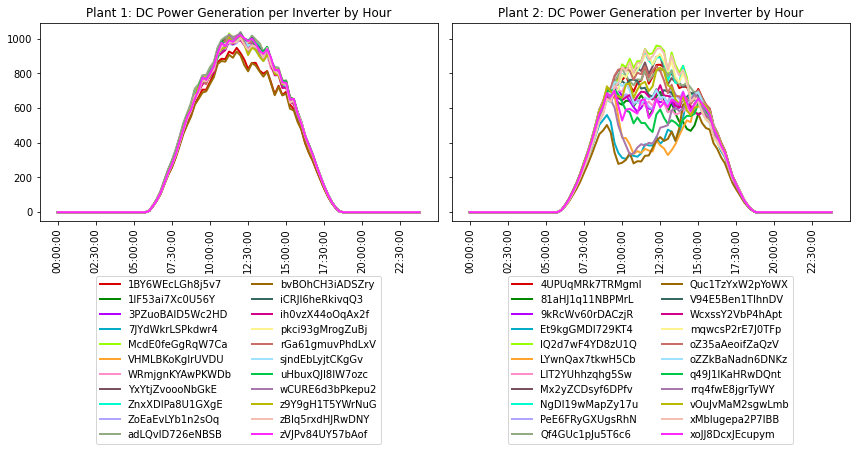

In [32]:
import colorcet as cc
from cycler import cycler
p1_dc_pwr = plant_df1.groupby(['time','source_key'])['dc_power'].mean().unstack()
p2_dc_pwr = plant_df2.groupby(['time','source_key'])['dc_power'].mean().unstack()

# sns.set_style('darkgrid')
colors = sns.color_palette(cc.glasbey_light,22)
cy = cycler('color', colors)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,7))
ax1.set_prop_cycle(cy)
ax1.plot(p1_dc_pwr,linewidth=2)
ax1.set_title('Plant 1: DC Power Generation per Inverter by Hour')
ax1.legend(p1_dc_pwr.columns,loc=9,bbox_to_anchor=(0.5,-0.25),ncol=2)
ax1.set_xticks(np.arange(0,100,10))
ax1.tick_params(axis='x',rotation=90)
ax1.set_xticks(np.arange(0,100,10))

ax2.set_prop_cycle(cy)
ax2.plot(p2_dc_pwr,linewidth=2)
ax2.set_title('Plant 2: DC Power Generation per Inverter by Hour')
ax2.legend(p2_dc_pwr.columns,loc=9,bbox_to_anchor=(0.5,-0.25),ncol=2)
ax2.set_xticks(np.arange(0,100,10))
ax2.tick_params(axis='x',rotation=90)
ax2.set_xticks(np.arange(0,100,10))
plt.tight_layout();

***

**Note:** Plant 1's DC power generation per inverters are tightly grouped. Again, we see much more variation in plant 2's inverters. There are 2 inverters in plant 1 that have slightly noticeable lower signals while 4 inverters in plant 2 that are substantially lower.
- Plant 1's underperforming inverters: "1BY6WEcLGh8j5v7" and "bvBOhCH3iADSZry".
- Plant 2's underperforming inverters: "Et9kgGMDl729KT4", "LYwnQax7tkwH5Cb", "Quc1TzYxW2pYoWX", and "rrq4fwE8jgrTyWY"

***

## Daily Yield and Total Yield

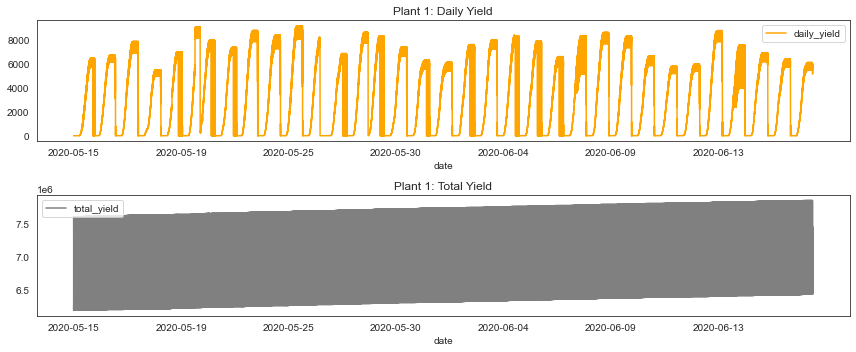

In [71]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,5))
plant_df1.plot(x='date',y='daily_yield',color='orange',ax=ax1)
plant_df1.plot(x='date',y='total_yield',color='grey',ax=ax2)
ax1.title.set_text('Plant 1: Daily Yield')
ax2.title.set_text('Plant 1: Total Yield')
plt.tight_layout();

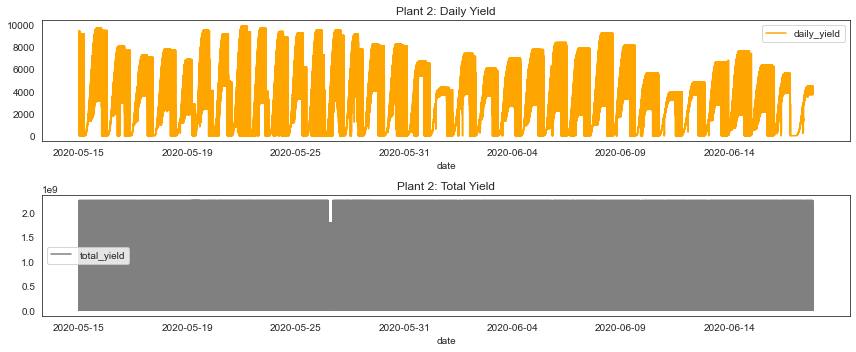

In [72]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,5))
plant_df2.plot(x='date',y='daily_yield',color='orange',ax=ax1)
plant_df2.plot(x='date',y='total_yield',color='grey',ax=ax2)
ax1.title.set_text('Plant 2: Daily Yield')
ax2.title.set_text('Plant 2: Total Yield')
plt.tight_layout();

***

**Note:** It looks like daily yield is the cumulative sum totals for each day while total yield is the cumulative sum for the entire 34 day period. We see wider/thicker bands within the daily fluctuations in plant 2's daily yield. It seems that Plant 1's total yield seems to trend upwards while plant 2's total yield is fixed within a range between 0 and 2.

***

# Weather Data

### Average Hourly Weather Observations

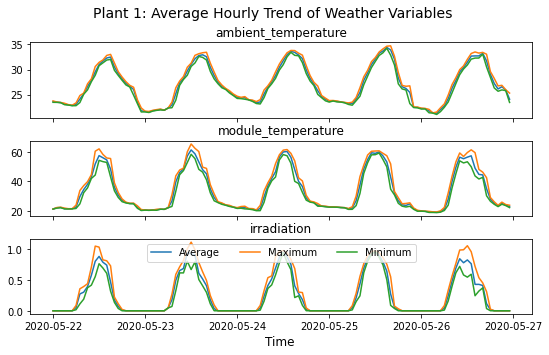

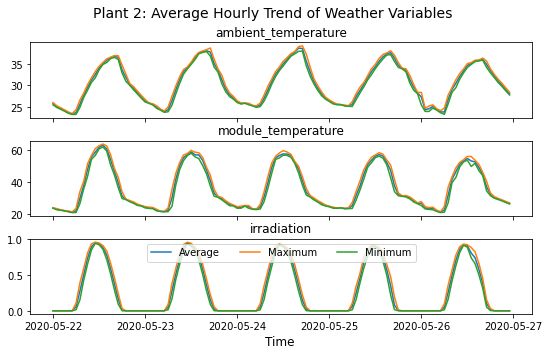

In [34]:
# Plant 1: Weather Variables to plot
vars = ['ambient_temperature','module_temperature','irradiation'] 

fig, axs = plt.subplots(3, sharex=True, sharey=False, figsize=(9,5))
fig.suptitle('Plant 1: Average Hourly Trend of Weather Variables', fontsize=14)

for i in range(3):
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').mean()['2020-05-22':'2020-05-26'][vars[i]], label='Average') # Average hourly
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').max()['2020-05-22':'2020-05-26'][vars[i]], label='Maximum') # Max. hourly
    axs[i].plot(plant_df1.set_index('date_time').resample('1H').min()['2020-05-22':'2020-05-26'][vars[i]], label='Minimum') # Min. hourly
    axs[i].set_title(vars[i])
fig.subplots_adjust(hspace=0.3)
# fig.text(0.04, 0.5, 'KW', va='center', rotation='vertical', fontsize=12)
fig.text(0.51, 0.04, 'Time', ha='center', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.show();

# Plant 2: Weather Variables to plot
vars = ['ambient_temperature','module_temperature','irradiation'] 

fig, axs = plt.subplots(3, sharex=True, sharey=False, figsize=(9,5))
fig.suptitle('Plant 2: Average Hourly Trend of Weather Variables', fontsize=14)

for i in range(3):
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').mean()['2020-05-22':'2020-05-26'][vars[i]], label='Average') # Average hourly
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').max()['2020-05-22':'2020-05-26'][vars[i]], label='Maximum') # Max. hourly
    axs[i].plot(plant_df2.set_index('date_time').resample('1H').min()['2020-05-22':'2020-05-26'][vars[i]], label='Minimum') # Min. hourly
    axs[i].set_title(vars[i])
fig.subplots_adjust(hspace=0.3)
# fig.text(0.04, 0.5, 'KW', va='center', rotation='vertical', fontsize=12)
fig.text(0.51, 0.04, 'Time', ha='center', fontsize=12)
plt.legend(loc='upper center', ncol=3)
plt.show();

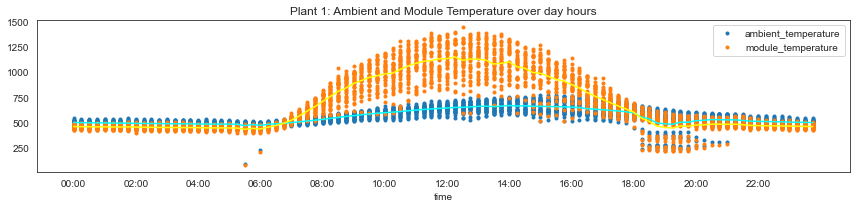

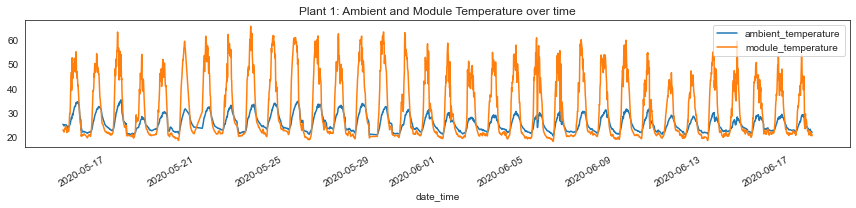

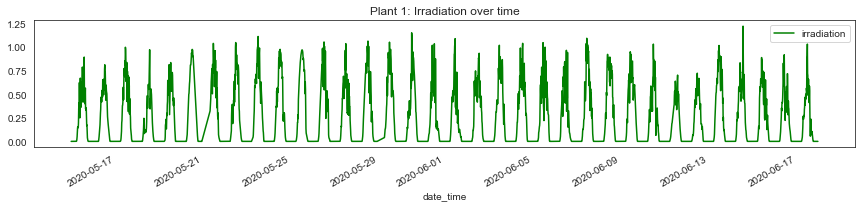

In [35]:
sns.set_style('white')

p1 = plant_df1.groupby('date_time').sum().reset_index()
p1['time']=p1['date_time'].dt.time
hourly_ticks = [60*60*i for i in range(0,24,2)]
sns.set_style('white')
p1.set_index('time')[['ambient_temperature','module_temperature']].plot(style= '.',figsize=(12,3),xticks=hourly_ticks,title='Plant 1: Ambient and Module Temperature over day hours')
p1.groupby('time')['ambient_temperature'].agg('mean').plot(color='cyan')
p1.groupby('time')['module_temperature'].agg('mean').plot(color='yellow')
plt.tight_layout();

df_gen1 = plant_df1.groupby('date_time').mean().reset_index()
df_gen1.plot(x ='date_time',y=['ambient_temperature','module_temperature'],title='Plant 1: Ambient and Module Temperature over time',figsize=(12,3))
# plt.ylabel('Temperature')
plt.tight_layout();

df_gen1.plot(x ='date_time',y=['irradiation'],title='Plant 1: Irradiation over time',color='green',figsize=(12,3))
plt.tight_layout();

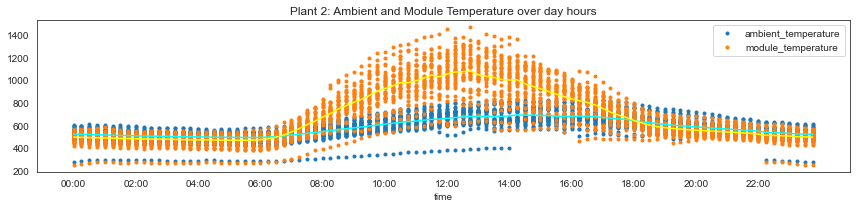

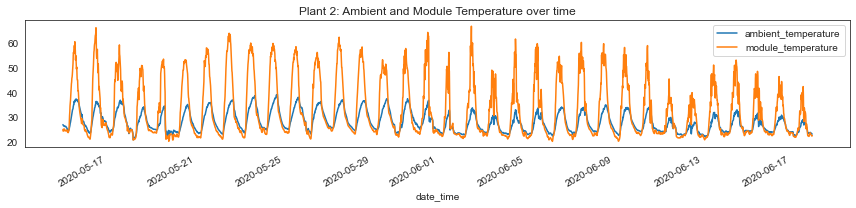

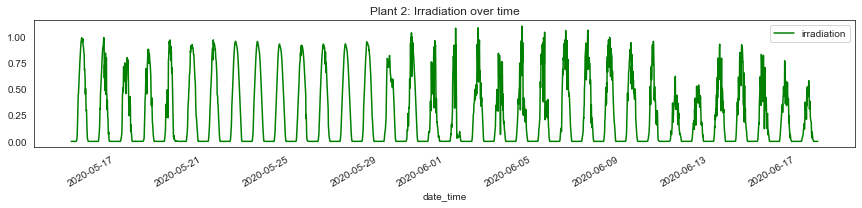

In [36]:
p2 = plant_df2.groupby('date_time').sum().reset_index()
p2['time']=p2['date_time'].dt.time
p2.set_index('time')[['ambient_temperature','module_temperature']].plot(style= '.',figsize=(12,3),xticks=hourly_ticks,title='Plant 2: Ambient and Module Temperature over day hours')
p2.groupby('time')['ambient_temperature'].agg('mean').plot(color='cyan')
p2.groupby('time')['module_temperature'].agg('mean').plot(color='yellow')
plt.tight_layout();

df_gen2 = plant_df2.groupby('date_time').mean().reset_index()
df_gen2.plot(x ='date_time',y=['ambient_temperature','module_temperature'],title='Plant 2: Ambient and Module Temperature over time',figsize=(12,3))
# plt.ylabel('Temperature')
plt.tight_layout();

df_gen2.plot(x ='date_time',y=['irradiation'],title='Plant 2: Irradiation over time',color='green',figsize=(12,3))
plt.tight_layout();

# Creating Plant Average Dataframes for Analysis

In [37]:
plant1_avg = plant_df1.groupby(['date_time']).agg('mean').reset_index()
plant2_avg = plant_df2.groupby(['date_time']).agg('mean').reset_index()

print(plant1_avg.shape)
print(plant2_avg.shape)

(3157, 13)
(3259, 13)


In [38]:
plant1_avg.describe()

,plant_id,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation,hour,day,month,year
count,3157.0,3157.000000,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.0
mean,4135001.0,311.710849,304.857459,3324.402716,6.977422e+06,25.560257,31.175453,0.230103,11.626227,15.783022,5.515996,2020.0
std,0.0,400.216841,391.090163,3045.292432,7.513782e+04,3.351059,12.272685,0.301348,6.867083,8.561164,0.499823,0.0
min,4135001.0,0.000000,0.000000,0.000000,6.635010e+06,20.398505,18.140415,0.000000,0.000000,1.000000,5.000000,2020.0
25%,4135001.0,0.000000,0.000000,4.124188,6.917337e+06,22.739895,21.130249,0.000000,6.000000,9.000000,5.000000,2020.0
50%,4135001.0,38.316610,37.040016,3009.619318,6.981686e+06,24.680324,24.801971,0.027748,12.000000,16.000000,6.000000,2020.0
75%,4135001.0,638.185733,625.096023,6094.517045,7.045256e+06,27.941221,41.449481,0.451576,18.000000,23.000000,6.000000,2020.0
max,4135001.0,1358.720714,1325.009659,8807.727273,7.097398e+06,35.252486,65.545714,1.221652,23.000000,31.000000,6.000000,2020.0


In [39]:
plant2_avg.describe()

,plant_id,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation,hour,day,month,year
count,3259.0,3259.000000,3259.000000,3259.000000,3.259000e+03,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.0
mean,4136001.0,248.818478,243.339215,3283.334245,6.636655e+08,28.069400,32.772408,0.232737,11.491255,16.003989,5.500153,2020.0
std,0.0,313.503377,306.485223,2339.704265,6.796735e+07,4.061556,11.344034,0.312693,6.923916,8.541578,0.500077,0.0
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000,0.000000,1.000000,5.000000,2020.0
25%,4136001.0,0.000000,0.000000,902.791991,6.450146e+08,24.602135,23.716881,0.000000,5.000000,9.000000,5.000000,2020.0
50%,4136001.0,23.618307,22.809630,3487.807792,6.451436e+08,26.981263,27.534606,0.019040,11.000000,16.000000,6.000000,2020.0
75%,4136001.0,533.909648,522.740660,5257.590909,6.746497e+08,31.056757,40.480653,0.438717,17.500000,23.000000,6.000000,2020.0
max,4136001.0,1210.477576,1180.898203,7923.055556,8.769846e+08,39.181638,66.635953,1.098766,23.000000,31.000000,6.000000,2020.0


## Plant 1

### Creating Target Feature Delta Daily Yield: 'delta_daily_yield'

In [40]:
p1_delta = plant1_avg[['daily_yield']]
p1_delta['delta_daily_yield'] = p1_delta.daily_yield.diff()
p1_delta['delta_daily_yield'].iloc[0] = 0
p1_delta[p1_delta < 0] = 0

In [41]:
plant1_avg['delta_daily_yield'] = p1_delta.delta_daily_yield

# plant1_avg['delta_daily_yield'].plot(figsize=(12,3))
# plt.tight_layout();

### Removing Outliers: 'delta_daily_yield2'

In [42]:
delta_dy = plant1_avg['delta_daily_yield'].copy()

delta_dy_mean = delta_dy.mean()
delta_dy_std = delta_dy.std()

print('delta daily yield mean for Plant 1: ',delta_dy_mean)
print('delta daily yield standard deviation for Plant 1: ',delta_dy_std)

delta daily yield mean for Plant 1:  77.50058541632838
delta daily yield standard deviation for Plant 1:  113.07911497371943


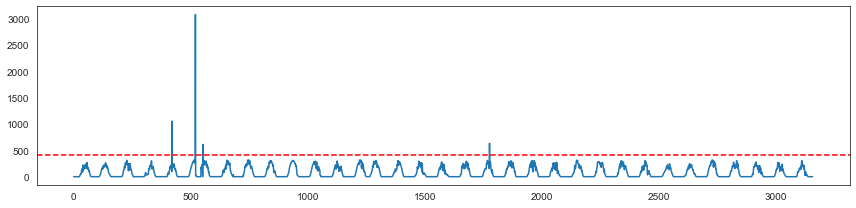

In [43]:
ax = delta_dy.plot(figsize=(12,3))
ax.axhline(delta_dy_mean + delta_dy_std * 3, ls='--', c='r')
# ax.axhline(dd2_mean - dd2_std * 3, ls='--', c='r')
plt.tight_layout();

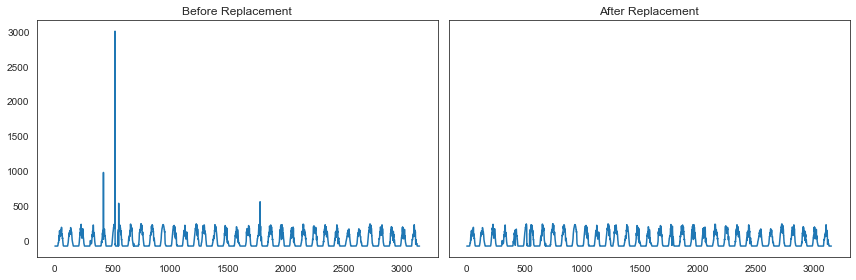

In [44]:
# Center data (mean=0) and replace outliers with the median value.
outliers = delta_dy > (delta_dy_std * 3)
delta_dy_centered = delta_dy - delta_dy_mean
delta_dy_fixed = delta_dy_centered.copy()
delta_dy_fixed[outliers] = np.median(delta_dy_fixed)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4),sharey=True)
delta_dy_centered.plot(ax=ax1)
delta_dy_fixed.plot(ax=ax2)
ax1.title.set_text('Before Replacement')
ax2.title.set_text('After Replacement')
plt.tight_layout();

In [45]:
plant1_avg['delta_daily_yield2'] = delta_dy_fixed

### Correlations

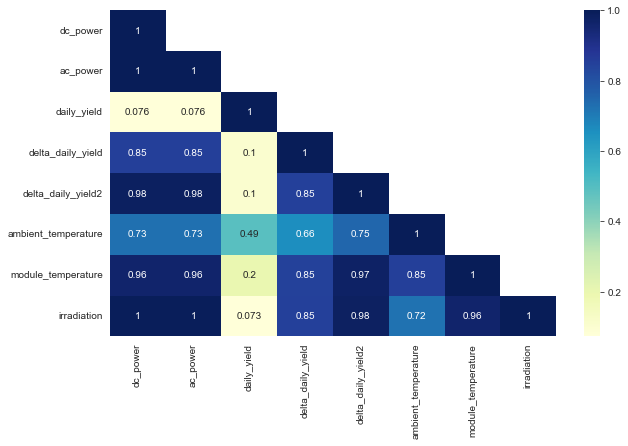

In [46]:
plant1_corr3 = plant1_avg[['dc_power','ac_power','daily_yield','delta_daily_yield','delta_daily_yield2','ambient_temperature','module_temperature','irradiation']]
plt.subplots(figsize=(10,6))
sns.heatmap(plant1_corr3.corr(),annot=True,cmap='YlGnBu',mask=(np.triu(plant1_corr3.corr(),+1)));

## Plant 2

### Creating Target Feature Delta Daily Yield: 'delta_daily_yield'

In [47]:
p2_delta = plant2_avg[['daily_yield']]
p2_delta['delta_daily_yield'] = p2_delta.daily_yield.diff()
p2_delta['delta_daily_yield'].iloc[0] = 0
p2_delta[p2_delta < 0] = 0

In [48]:
plant2_avg['delta_daily_yield'] = p2_delta.delta_daily_yield

### Removing Outliers: 'delta_daily_yield2'

In [49]:
delta_dy = plant2_avg['delta_daily_yield'].copy()

delta_dy_mean = delta_dy.mean()
delta_dy_std = delta_dy.std()

print('delta daily yield mean for Plant 2: ',delta_dy_mean)
print('delta daily yield standard deviation for Plant 2: ',delta_dy_std)

delta daily yield mean for Plant 2:  76.16687427672386
delta daily yield standard deviation for Plant 2:  194.1244180181867


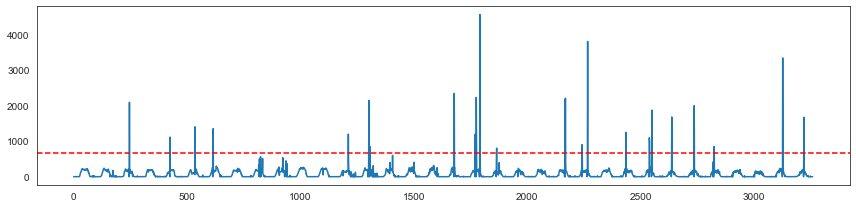

In [50]:
ax = delta_dy.plot(figsize=(12,3))
ax.axhline(delta_dy_mean + delta_dy_std * 3, ls='--', c='r')
# ax.axhline(dd2_mean - dd2_std * 3, ls='--', c='r')
plt.tight_layout();

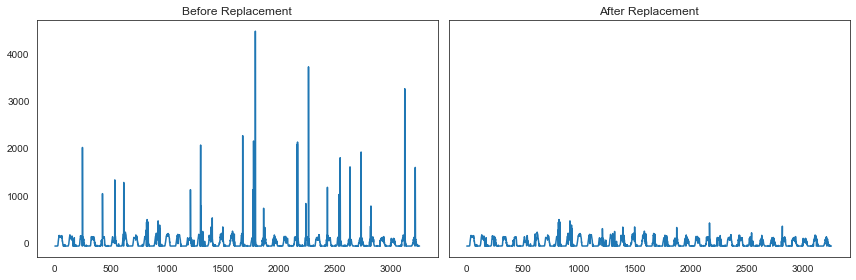

In [51]:
# Center data (mean=0) and replace outliers with the median value.
outliers = delta_dy > (delta_dy_std * 3)
delta_dy_centered = delta_dy - delta_dy_mean
delta_dy_fixed = delta_dy_centered.copy()
delta_dy_fixed[outliers] = np.median(delta_dy_fixed)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4),sharey=True)
delta_dy_centered.plot(ax=ax1)
delta_dy_fixed.plot(ax=ax2)
ax1.title.set_text('Before Replacement')
ax2.title.set_text('After Replacement')
plt.tight_layout();

In [52]:
plant2_avg['delta_daily_yield2'] = delta_dy_fixed

### Correlations

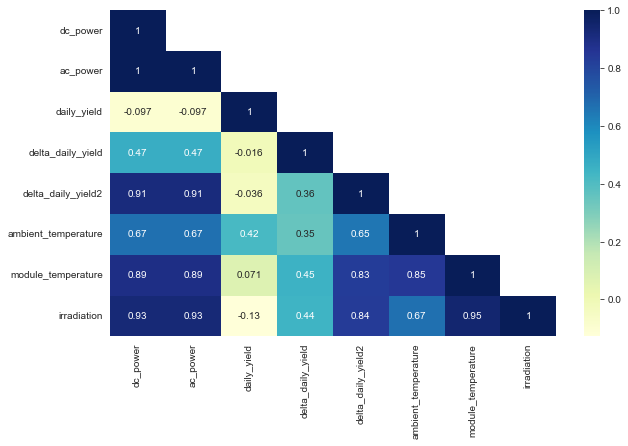

In [53]:
plant2_corr3 = plant2_avg[['dc_power','ac_power','daily_yield','delta_daily_yield','delta_daily_yield2','ambient_temperature','module_temperature','irradiation']]
plt.subplots(figsize=(10,6))
sns.heatmap(plant2_corr3.corr(),annot=True,cmap='YlGnBu',mask=(np.triu(plant2_corr3.corr(),+1)));

# Preprocessing and Training

## Plant 1

### Train-Test-Split

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

X1 = plant1_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y1 = plant1_avg[['delta_daily_yield2']]

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size=0.3, random_state=123)

### Linear Regression

In [55]:
lm = LinearRegression()

lm.fit(X_train1, y_train1)
y_pred1 = lm.predict(X_test1)

print(r2_score(y_pred1, y_test1))
# lm.score(X_test1, y_test1)
print(lm.coef_)

0.9815737907872267
[[ 89.61925054 -13.92289033  63.06644085 -44.74684929]]


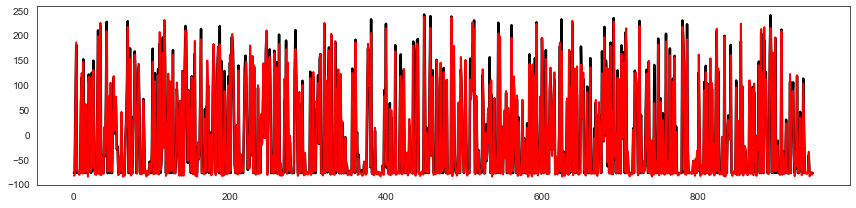

In [56]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(np.array(y_test1), color='k', lw=2.5)
ax.plot(y_pred1, color='r', lw=2)
plt.tight_layout();

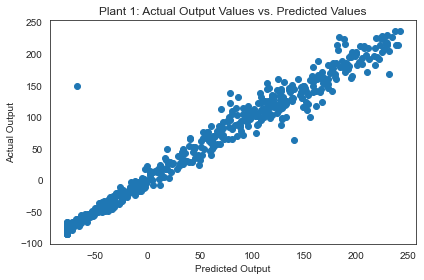

In [57]:
plt.scatter(y_test1, y_pred1)
plt.title('Plant 1: Actual Output Values vs. Predicted Values')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.tight_layout();

## Plant 2

### Train-Test-Split

In [58]:
X2 = plant2_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y2 = plant2_avg[['delta_daily_yield2']]

scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3, random_state=123)

### Linear Regression

In [59]:
lm = LinearRegression()

lm.fit(X_train2, y_train2)
y_pred2 = lm.predict(X_test2)

print(r2_score(y_pred2, y_test2))
# lm.score(X_test2, y_test2)
print(lm.coef_)

0.8488721161918809
[[ 78.38991843  -0.78410269  23.20697639 -26.54310168]]


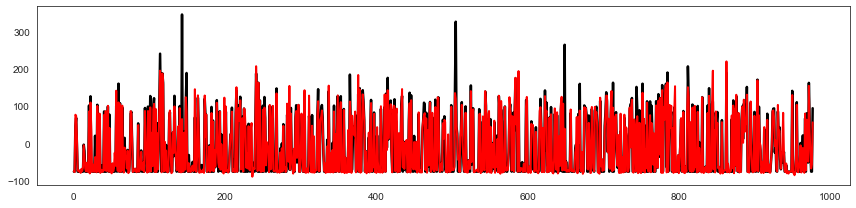

In [60]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(np.array(y_test2), color='k', lw=2.5)
ax.plot(y_pred2, color='r', lw=2)
plt.tight_layout();

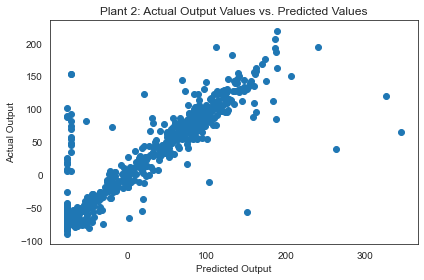

In [61]:
plt.scatter(y_test2, y_pred2)
plt.title('Plant 2: Actual Output Values vs. Predicted Values')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.tight_layout();